In [1]:
from qiskit import QuantumCircuit
import numpy as np

rand_vec = [np.random.randint(0,2) for i in range(4)]
optimum_parameters = []

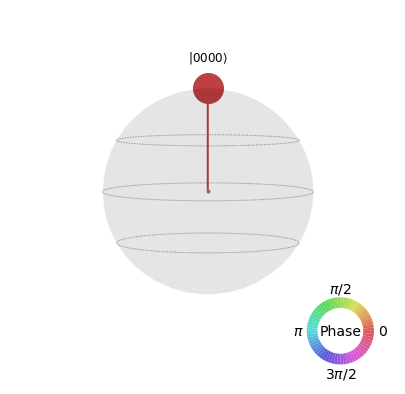

In [2]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

sv = Statevector.from_label('0000')
plot_state_qsphere(sv)

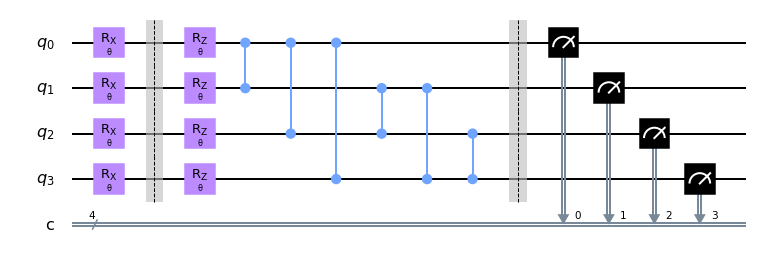

In [13]:
from qiskit.circuit import Parameter
import numpy as np
from qiskit import QuantumRegister

L = 1
theta = Parameter('θ')
angle = np.random.randint(0,2*np.pi, size = 1)
#q = QuantumRegister(4)
qc = QuantumCircuit(4,4)
#qc.initialize([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [q[0],q[1],q[2],q[3]])
for l in range(L):
    qc.rx(theta, range(4))
    qc.barrier()

    qc.rz(theta, range(4))
    qc.cz(0,1)
    qc.cz(0,2)
    qc.cz(0,3)
    qc.cz(1,2)
    qc.cz(1,3)
    qc.cz(2,3)
    qc.barrier()

#qc.z([0,1,2,3])
qc.measure([0,1,2,3],[0,1,2,3])
qc.draw('mpl')

In [7]:
import random
#theta_range = np.linspace(0, 2 * np.pi, 128)
#np.random.shuffle(theta_range)
#angle = theta_range[0]
angle = random.uniform(0,2*np.pi)
#new_qc = qc.bind_parameters({theta: angle})
#new_qc = [qc.bind_parameters({theta: theta_value}) for theta_value in theta_range]


In [54]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

simulator = Aer.get_backend('qasm_simulator')
epsilons = []
parameters = []
min_obj = 2
d = 1
rand = str(rand_vec[0])+str(rand_vec[1])+str(rand_vec[2])+str(rand_vec[3])
#print(rand)
stepsize = 0.2
for i in range(500):
    prob = []
    print(rand)
    #angle = random.uniform(0,2*np.pi)
    result = execute(qc,simulator,shots=1024,parameter_binds = [{theta: angle}]).result()
    #print(result)
    #counts = result.get_counts()
    counts = result.get_counts()
    #print(counts)
    s = 0
    for key,value in counts.items():
        counts[key] = value/1024
        if key == rand:
            s = s + pow(1 - counts[key], 2)
        else:
            s = s + pow(counts[key],2)
    #print(s)
    #print(counts)
    #statevector = result.get_statevector(qc)
    #print(statevector)
    output = max(counts, key = counts.get)
    print(output)
    #print(shots)
    #print(counts[rand])
    #print(c)
    #print(counts.items())
    #A_expectation = lambda @ p
    #print(A_expectation)
    #print(result.to_dict())
    #print(counts)
    #vec = output[0]
    #print(vec)
    obj = s
    print(obj)
    prev_dir = d
    if obj == 0:
        optimum_parameter = angle
        break
    if obj < min_obj:
        min_obj = obj
        optimum_parameter = angle
        if prev_dir:
            angle = angle + stepsize*s
        else:
            angle = angle - stepsize*s
        d = prev_dir
    elif obj == min_obj:
        if prev_dir:
            angle = angle + stepsize*s
        else:
            angle = angle - stepsize*s
    elif obj > min_obj:
        if prev_dir:
            angle = angle - stepsize*s
            d = 0
        else:
            angle = angle + stepsize*s
            d = 1
    

    
optimum_parameters.append(optimum_parameter)
    
#plot_histogram(counts)

0101
0000
0.9280109405517578
0101
1111
1.056570053100586
0101
1101
0.9679222106933594
0101
0000
1.1403484344482422
0101
1101
0.9981899261474609
0101
0000
1.4583377838134766
0101
0111
0.9703311920166016
0101
0000
1.0895671844482422
0101
1100
0.9365692138671875
0101
0000
0.8816547393798828
0101
1111
1.043832778930664
0101
1011
0.9495086669921875
0101
0000
1.1304492950439453
0101
1101
0.9953346252441406
0101
0000
1.4256916046142578
0101
0111
0.9852504730224609
0101
0000
1.3307437896728516
0101
1111
0.9355449676513672
0101
1110
0.9464397430419922
0101
1111
0.8931713104248047
0101
1101
0.9227561950683594
0101
1111
0.9408130645751953
0101
1011
0.942108154296875
0101
1111
0.9408836364746094
0101
0111
0.9613761901855469
0101
1111
0.919647216796875
0101
1101
0.9953937530517578
0101
1111
0.9094467163085938
0101
0111
0.9748744964599609
0101
1111
0.9452056884765625
0101
0111
0.9983119964599609
0101
1111
0.9237289428710938
0101
1101
1.0361156463623047
0101
1111
0.9153289794921875
0101
1101
1.041784

1110
1.0031375885009766
0101
1111
0.9686336517333984
0101
1011
0.9762382507324219
0101
1111
1.0815391540527344
0101
0111
1.0255889892578125
0101
1111
0.9675769805908203
0101
1011
0.9982242584228516
0101
1111
0.9918766021728516
0101
1101
0.9907131195068359
0101
1111
0.9700164794921875
0101
1101
0.984527587890625
0101
1111
1.0122623443603516
0101
1011
1.0195541381835938
0101
1111
0.9969921112060547
0101
0111
0.9738140106201172
0101
1111
0.9823760986328125
0101
1110
0.9840679168701172
0101
1111
0.9927425384521484
0101
1110
0.9994869232177734
0101
1111
1.03924560546875
0101
1110
0.9902229309082031
0101
1111
1.0022621154785156
0101
1101
1.0348243713378906
0101
1111
0.9969635009765625
0101
1101
0.9989757537841797
0101
1111
1.0009193420410156
0101
1101
0.9941635131835938
0101
1111
0.9743518829345703
0101
1101
0.97705078125
0101
1111
0.9634113311767578
0101
1110
0.9968643188476562
0101
1111
1.0144424438476562
0101
1101
0.9676780700683594
0101
1111
0.9715499877929688
0101
1011
1.007661819458007

In [30]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit import Aer, execute
from qiskit.aqua.components.optimizers import AQGD
import numpy as np
import random

optimum_parameters = []
epsilons = []
L = 10
angle = [random.uniform(0,2*np.pi)]
rand_vec = [np.random.randint(0,2) for i in range(4)]
rand = str(rand_vec[0])+str(rand_vec[1])+str(rand_vec[2])+str(rand_vec[3])

def obj_fn(params):
    result = execute(qc,simulator,shots=1024,parameter_binds = [{theta: params[0]}]).result()
    counts = result.get_counts()
    s = 0
    for key,value in counts.items():
        counts[key] = value/1024
        if key == rand:
            s = s + pow(1 - counts[key], 2)
        else:
            s = s + pow(counts[key],2)
    return s

for l in range(L):
    theta = Parameter('θ')
    qc = QuantumCircuit(4,4)

    for i in range(l+1):
        qc.rx(theta, range(4))
        qc.barrier()

        qc.rx(theta, range(4))
        qc.cz(0,1)
        qc.cz(0,2)
        qc.cz(0,3)
        qc.cz(1,2)
        qc.cz(1,3)
        qc.cz(2,3)
        qc.barrier()

    qc.measure([0,1,2,3],[0,1,2,3])
    #qc.draw('mpl')    
    simulator = Aer.get_backend('qasm_simulator')
    
    a = AQGD()
    optimum_parameter, epsilon, it = AQGD.optimize(a,num_vars = 1,objective_function = obj_fn,initial_point=angle)
    
    optimum_parameters.append(optimum_parameter)
    epsilons.append(epsilon)


In [31]:
optimum_parameters

[array([17.25864122]),
 array([12.74209946]),
 array([4.69848513]),
 array([6.34981638]),
 array([3.63552611]),
 array([4.44151729]),
 array([7.62697504]),
 array([12.4856611]),
 array([-1.39368337]),
 array([4.55413138])]

In [32]:
epsilons

[0.0001010894775390625,
 0.0,
 0.6650543212890625,
 0.0,
 0.03455352783203125,
 0.08177757263183594,
 2.09808349609375e-05,
 1.9073486328125e-06,
 0.000301361083984375,
 0.01299285888671875]

In [30]:
rand_vec

[1, 0, 1, 0]

In [1]:
import pennylane as qml 
from pennylane import numpy as np

In [ ]:
dev1 = qml.device('default.qubit',wires=1)

In [ ]:
@qml.qnode(dev1)
def circuit(params):
    qml.RX(params[0],wires=0)
    qml.RY(params[1],wires=0)
    return qml.expval(qml.PauliZ(0))

In [ ]:
print(circuit([0.54, 0.12]))

In [2]:
import random
rand_vec = [np.random.randint(0,2) for i in range(4)]


In [3]:
dev = qml.device('default.qubit',wires=4)    

In [4]:
L = 3
@qml.qnode(dev)
def circuit(params):
    for i in range(L):
        qml.RX(params,wires=0)
        qml.RX(params,wires=1)
        qml.RX(params,wires=2)
        qml.RX(params,wires=3)
        qml.RZ(params,wires=0)
        qml.RZ(params,wires=1)
        qml.RZ(params,wires=2)
        qml.RZ(params,wires=3)
    qml.CZ(wires=[0,1])
    qml.CZ(wires=[0,2])
    qml.CZ(wires=[0,3])
    qml.CZ(wires=[1,2])
    qml.CZ(wires=[1,3])
    qml.CZ(wires=[2,3])
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2)), qml.expval(qml.PauliZ(3))
    #return qml.probs(wires=0),qml.probs(wires=1),qml.probs(wires=2),qml.probs(wires=3)

In [5]:
angle = random.uniform(0,2*np.pi)
print(angle)
#print(circuit(angle))

4.246374929206798


In [6]:
def cost(x):
    s = 0
    val = circuit(x)
    #print(prob)
    for i in range(4):
        s = s + pow(val[i] - rand_vec[i],2)
        #print(s)
    return s

In [7]:
#print(rand_vec)
#print(circuit(angle))
cost(angle)

1.5730665082872692

In [9]:
opt = qml.GradientDescentOptimizer(stepsize=0.4)

steps = 100
# set the initial parameter values
params = angle

for i in range(steps):
    # update the circuit parameters
    params = opt.step(cost, params)

    if (i + 1) % 5 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost(params)))

print("Optimized rotation angles: {}".format(params))

Cost after step     5:  12.7362006
Cost after step    10:  0.9950723
Cost after step    15:  3.2019369
Cost after step    20:  0.7981912
Cost after step    25:  0.8664841
Cost after step    30:  12.2473277
Cost after step    35:  0.9560449
Cost after step    40:  0.9926775
Cost after step    45:  3.2664291
Cost after step    50:  0.7523529
Cost after step    55:  11.6707766
Cost after step    60:  5.4040226
Cost after step    65:  4.5951500
Cost after step    70:  0.9443393
Cost after step    75:  1.9045106
Cost after step    80:  0.7654202
Cost after step    85:  0.9848192
Cost after step    90:  0.9962004
Cost after step    95:  3.1992337
Cost after step   100:  0.9750647
Optimized rotation angles: 45.49643610942181


In [37]:
epsilon

[0.2684040069580078,
 0.10168838500976562,
 0.7010173797607422,
 0.9466609954833984,
 0.7305660247802734,
 0.3648223876953125,
 0.1248016357421875,
 0.09450912475585938,
 0.1840972900390625,
 0.5055084228515625]

In [18]:
def obj_fn(params):
    result = execute(qc,simulator,shots=1024,parameter_binds = [{theta: params[0]}]).result()
    counts = result.get_counts()
    s = 0
    k = 0
    for key,value in counts.items():
        counts[key] = value/1024
        k = k + counts[key]
        print(k)
        if key == rand:
            s = s + pow(1 - counts[key], 2)
        else:
            s = s + pow(counts[key],2)
    
    return s

In [19]:
from qiskit.aqua.components.optimizers import AQGD
import random
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit import Aer, execute
import numpy as np

angle = [random.uniform(0,2*np.pi)]
print(angle)
a = AQGD(disp=1)
AQGD.optimize(a,num_vars = 1,objective_function = obj_fn,variable_bounds = [(0, 2*np.pi)],initial_point=angle)

[0.8088227953552584]
0.53125
0.625
0.7158203125
0.728515625
0.81640625
0.8349609375
0.8564453125
0.859375
0.9365234375
0.9599609375
0.9716796875
0.9755859375
0.9951171875
0.9970703125
1.0
Iteration: 0 	| Energy: 1.307199478149414
0.0009765625
0.0029296875
0.0205078125
0.0244140625
0.0380859375
0.0556640625
0.1494140625
0.15234375
0.1650390625
0.173828125
0.279296875
0.28515625
0.3818359375
0.4462890625
1.0
0.5693359375
0.6669921875
0.75
0.7685546875
0.8505859375
0.86328125
0.87109375
0.8720703125
0.9580078125
0.9697265625
0.9833984375
0.986328125
0.9921875
0.994140625
1.0
0.2900390625
0.37890625
0.4921875
0.529296875
0.642578125
0.6806640625
0.71875
0.7333984375
0.8408203125
0.876953125
0.91015625
0.921875
0.9619140625
0.982421875
0.9931640625
1.0
Iteration: 1 	| Energy: 1.115011215209961
0.0009765625
0.005859375
0.0087890625
0.0126953125
0.0576171875
0.064453125
0.06640625
0.1171875
0.1201171875
0.171875
0.2333984375
1.0
0.7734375
0.8232421875
0.8740234375
0.8798828125
0.931640625
0.9

0.064453125
0.1240234375
0.181640625
0.2509765625
0.306640625
0.37109375
0.4228515625
0.4892578125
0.5537109375
0.623046875
0.68359375
0.755859375
0.810546875
0.8779296875
0.939453125
1.0
0.068359375
0.134765625
0.2109375
0.2763671875
0.3291015625
0.3984375
0.458984375
0.5263671875
0.5830078125
0.6396484375
0.7080078125
0.767578125
0.8271484375
0.8955078125
0.94921875
1.0
1.0
Iteration: 22 	| Energy: 1.0
0.06640625
0.13671875
0.1904296875
0.2587890625
0.318359375
0.37109375
0.4443359375
0.5166015625
0.576171875
0.634765625
0.681640625
0.73046875
0.7900390625
0.857421875
0.927734375
1.0
0.0654296875
0.1357421875
0.1962890625
0.26953125
0.345703125
0.4072265625
0.4755859375
0.5302734375
0.5810546875
0.64453125
0.7060546875
0.75390625
0.8203125
0.8828125
0.939453125
1.0
0.9990234375
1.0
Iteration: 23 	| Energy: 0.9980487823486328
0.0576171875
0.1220703125
0.185546875
0.2626953125
0.3291015625
0.39453125
0.4462890625
0.5087890625
0.5625
0.61328125
0.68359375
0.73828125
0.810546875
0.881835

(array([0.01700089]), 0.4550056457519531, 26)

In [14]:
variable_bounds = [(0, 2*np.pi)]
variable_bounds

[(0, 6.283185307179586)]

In [29]:
epsilons

[0.542938232421875,
 0.0911102294921875,
 0.14142417907714844,
 0.16558837890625,
 0.116363525390625,
 0.6248512268066406,
 0.13294601440429688,
 0.15921401977539062,
 0.08708000183105469,
 0.20165061950683594]

In [33]:
rand_vec

[0, 0, 0, 0]